# Step 1: Import basic library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Machine Learning Library

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from random import randint

##### loading the dataset

In [3]:
HealthStrokeDataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

##### Creating a copy of the original dataset

In [4]:
HealthStrokeDatasetCopy = HealthStrokeDataset.copy()

##### view the first 5 rows in the dataset

In [ ]:
HealthStrokeDataset.head()

##### view the last 5 rows in the dataset

In [ ]:
HealthStrokeDataset.tail()

##### Inspecting the dataset

In [ ]:
HealthStrokeDataset.info()

# Step 2: Data Preprocessing and Data cleaning

##### summary statistics for age, avg_glucose_level and bmi columns

In [ ]:
HealthStrokeDataset[['age','avg_glucose_level','bmi']].describe()

##### Checking for missing values

In [ ]:
HealthStrokeDataset.isnull().sum()

##### Filling in missing values with mean of the column

In [5]:
HealthStrokeDataset['bmi'] = HealthStrokeDataset['bmi'].fillna(HealthStrokeDataset['bmi'].mean())

#### checking for duplicates in the dataframe

In [ ]:
int(HealthStrokeDataset.duplicated(subset=None,keep='first').sum())

### checking for outliers in the dataframe

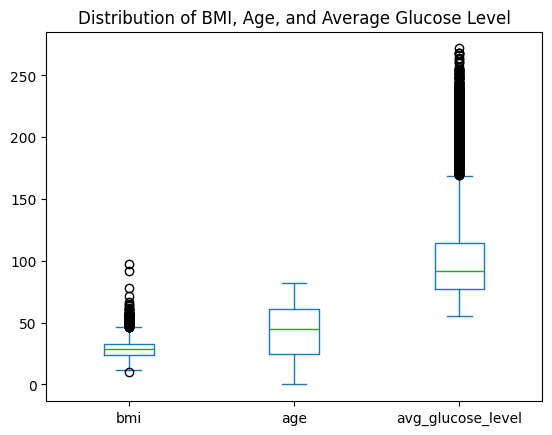

In [6]:
x = HealthStrokeDataset[['bmi','age','avg_glucose_level']]
x.plot(kind='box')
plt.title('Distribution of BMI, Age, and Average Glucose Level')
plt.show()

##### From the above graph, it shows that we have outliers in bmi and average glucose level columns.

#### checking for columns with outliers and some of those outliers in each column.

In [ ]:
column  = ['bmi','age','avg_glucose_level']
# Compute IQR for each column
Q1 = HealthStrokeDataset[column].quantile(0.25)
Q3 = HealthStrokeDataset[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Find the sum and columns with outliers
outlier_cols = {}
for col in column:
    sum_of_outliers = ((HealthStrokeDataset[col] < lower_bound[col]) |
                (HealthStrokeDataset[col] > upper_bound[col])).sum()
    if sum_of_outliers > 0:
        outlier_cols[col] = int(sum_of_outliers)
print(outlier_cols)

In [ ]:
#Rows with outliers in avg_glucose_level column
HealthStrokeDataset[((HealthStrokeDataset['avg_glucose_level'] < lower_bound['avg_glucose_level']) |
                (HealthStrokeDataset['avg_glucose_level'] > upper_bound['avg_glucose_level']))]

In [7]:
X = HealthStrokeDataset[['smoking_status','bmi','avg_glucose_level','Residence_type','work_type', 'gender','age', 'hypertension', 'heart_disease', 'ever_married']]
y = HealthStrokeDataset['stroke']

In [41]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
le = LabelEncoder()
scaler = StandardScaler()

In [10]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
     X.loc[:, col] = le.fit_transform(X[col])

In [12]:
X.head()

,smoking_status,bmi,avg_glucose_level,Residence_type,work_type,gender,age,hypertension,heart_disease,ever_married
0,1,36.600000,228.69,1,2,1,67.0,0,1,1
1,2,28.893237,202.21,0,3,0,61.0,0,0,1
2,2,32.500000,105.92,0,2,1,80.0,0,1,1
3,3,34.400000,171.23,1,2,0,49.0,0,0,1
4,2,24.000000,174.12,0,3,0,79.0,1,0,1


In [14]:
X.loc[:,['bmi', 'avg_glucose_level', 'age']] = scaler.fit_transform(X[['bmi', 'avg_glucose_level', 'age']])

In [17]:
# Principal component analysis
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(5110, 7)

In [18]:
pca.explained_variance_ratio_

array([0.35672828, 0.17000109, 0.13584805, 0.11610988, 0.10491545,
       0.04036657, 0.03881943])

In [19]:
pca.n_components_

np.int64(7)

In [20]:
X_pca

array([[-1.53998555,  2.71630425,  0.03787634, ..., -0.43946141,
         0.43024974,  0.57047487],
       [-0.76172323,  1.88627414,  1.37723451, ...,  0.15477544,
        -0.42818145, -0.57622749],
       [-1.44431753,  0.19983867,  0.07437055, ...,  1.13257396,
        -0.60762602,  0.57645344],
       ...,
       [ 0.2937117 , -0.42739805,  0.67681807, ...,  0.36847081,
        -0.45129965, -0.46063699],
       [-0.25278334,  1.20111297,  0.070402  , ..., -0.25329817,
        -0.57178482,  0.43417621],
       [-0.37920581, -0.61458577, -2.13146147, ..., -0.66096279,
         0.53713802, -0.32306339]], shape=(5110, 7))

In [21]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9647749510763209

In [ ]:
#Let's now select only two components

In [34]:
pca = PCA(n_components=5)
X_pca1 = pca.fit_transform(X)
X_pca.shape

(5110, 2)

In [35]:
pca.explained_variance_ratio_

array([0.35672828, 0.17000109, 0.13584805, 0.11610988, 0.10491545])

In [36]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca1, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9647749510763209

In [47]:
# Define pipeline for classification
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameters grid for classification
param_grid = [
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 2, 3, 4, 6, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__leaf_size': [20, 10, 15, 25, 35, 5],
        'classifier__p': [1, 2]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [30, 70, 120, 180],
        'classifier__learning_rate': [0.03, 0.15, 0.25],
        'classifier__max_depth': [4, 5, 10],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__splitter': ["best", "random"],
        'classifier__max_depth': [None, 5, 10, 20, 30],
        'classifier__min_samples_leaf': [1,2, 4, 7, 5],
        'classifier__min_samples_split': [2, 3, 4,6],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__class_weight': [None, 'balanced']
    }
]

In [48]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, 
                                 param_grid, 
                                 cv=5, 
                                 scoring='neg_mean_absolute_error', 
                                 n_jobs=-1,
                                 error_score='raise')

In [49]:
random_search.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('classifier',
                                              KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [KNeighborsClassifier()],
                                         'classifier__algorithm': ['auto',
                                                                   'ball_tree',
                                                                   'kd_tree',
                                                                   'brute'],
                                         'classifier__leaf_size': [20, 10, 15,
                                                                   25, 35, 5],
                                         'classifier__n_neighbors': [5, 2, 3, 4,
                                                                     6, 7],
                                         'classifier__p': [1, 2],
                                         'c...
                                        {'classifier': [DecisionTreeClassifier(random_state=42)],
                                         'classifier__class_weight': [None,
                                                                      'balanced'],
                                         'classifier__max_depth': [None, 5, 10,
                                                                   20, 30],
                                         'classifier__max_features': ['sqrt',
                                                                      'log2',
                                                                      None],
                                         'classifier__min_samples_leaf': [1, 2,
                                                                          4, 7,
                                                                          5],
                                         'classifier__min_samples_split': [2, 3,
                                                                           4,
                                                                           6],
                                         'classifier__splitter': ['best',
                                                                  'random']}],
                   scoring='neg_mean_absolute_error')

In [50]:
# Print best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'classifier__n_estimators': 30, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 4, 'classifier__learning_rate': 0.15, 'classifier': GradientBoostingClassifier(random_state=42)}


In [51]:
#select the best model
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=4,
                                            max_features='sqrt',
                                            min_samples_split=5,
                                            n_estimators=30,
                                            random_state=42))])

In [53]:
# Evaluate on test data
y_pred = best_model.predict(X_test_pca)

# Step 3: Defining inputs and outputs

In [75]:
inputs = HealthStrokeDataset[['smoking_status','bmi','avg_glucose_level','Residence_type','work_type', 'gender','age', 'hypertension', 'heart_disease', 'ever_married']]
outputs = HealthStrokeDataset['stroke']

# Step 4: Split the dataset into training and testing sets

In [76]:
X_train,X_test,y_train,y_test = train_test_split(inputs,outputs,random_state=42,test_size=0.2)

In [77]:
HealthStrokeDataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [78]:
HealthStrokeDataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [98]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:03
Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [80]:
column_trans = ColumnTransformer([('onehot',OneHotEncoder(handle_unknown='ignore'),['gender','ever_married','work_type','Residence_type','smoking_status']),
                                  ('scaler', StandardScaler(), ['bmi', 'avg_glucose_level', 'age']),
                                 ('pca',PCA(),['bmi', 'avg_glucose_level', 'age'])],
                                 remainder = 'passthrough',
                                force_int_remainder_cols=False
                                )

In [101]:
# Define pipeline for classification
pipe1 = Pipeline([
    ('transfomer',column_trans),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters grid for classification
param_grid = [
     # RandomForestClassifier parameters
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__class_weight': ['balanced', 'balanced_subsample', None],
        'classifier__bootstrap': [True, False]
    },
     # LogisticRegression parameters
    {
        'classifier': [LogisticRegression(random_state=42, max_iter=1000)],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__class_weight': ['balanced', None],
        'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # For elasticnet
    },
     # XGBClassifier parameters
    {
        'classifier': [XGBClassifier(random_state=42, eval_metric='logloss')],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0],
        'classifier__gamma': [0, 0.1, 0.2],
        'classifier__scale_pos_weight': [1, len(y_train[y_train==0])/len(y_train[y_train==1])]  # Handles imbalance
    }
]

In [102]:
X1 = HealthStrokeDataset[['smoking_status','bmi','avg_glucose_level','Residence_type','work_type', 'gender','age', 'hypertension', 'heart_disease', 'ever_married']]
y1 = HealthStrokeDataset['stroke']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=42,test_size=0.20)

In [104]:
# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=pipe1, param_distributions=param_grid, 
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [105]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transfomer',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['gender',
                                                                                'ever_married',
                                                                                'work_type',
                                                                                'Residence_type',
                                                                                'smoking_status']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               ['bmi',
                                                                                'avg_glucose_level',
                                                                                'age']),
                                                                              ('pca',
                                                                               PCA(),
                                                                               ['...
                                                                      num_parallel_tree=None, ...)],
                                         'classifier__colsample_bytree': [0.6,
                                                                          0.8,
                                                                          1.0],
                                         'classifier__gamma': [0, 0.1, 0.2],
                                         'classifier__learning_rate': [0.01,
                                                                       0.1,
                                                                       0.2],
                                         'classifier__max_depth': [3, 5, 7, 9],
                                         'classifier__n_estimators': [50, 100,
                                                                      200],
                                         'classifier__scale_pos_weight': [1,
                                                                          20.86096256684492],
                                         'classifier__subsample': [0.6, 0.8,
                                                                   1.0]}],
                   random_state=42, scoring='accuracy')

In [ ]:
cv_scores = cross_val_score(random_search,X_train,y_train,cv=5,scoring='accuracy')

In [107]:
# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95471236]
Mean cross-validation score: 0.9542565830622498


In [108]:
#select the best model
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('transfomer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('scaler', StandardScaler(),
                                                  ['bmi', 'avg_glucose_level',
                                                   'age']),
                                                 ('pca', PCA(),
                                                  ['bmi', 'avg_glucose_level',
                                                   'age'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features='log2',
                                        min_samples_leaf=4, min_samples_split=5,
                                        n_estimators=200, random_state=42))])

In [109]:
# Evaluate on test data
y_pred = best_model.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.9393346379647749

In [111]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve)

In [112]:
confusion_matrix(y_test,y_pred)

array([[960,   0],
       [ 62,   0]])

In [113]:
f1_score(y_test,y_pred)

0.0

In [114]:
y_test.sum()

np.int64(62)

In [115]:
y_pred.sum()

np.int64(0)